## Logistic Regression Sklearn Deployment
### 1. Import packages and load data

In [1]:
import seaborn as sns
import numpy as np
import sys
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../src")
import utils

In [2]:
df = utils.load_data('../data/raw/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,"61,833.900",256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,"68,441.850",193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,"59,785.940",236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,"54,806.180",245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,"73,889.990",225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### 2. Data pre-processing
- Visualize data
- Split data into training, cross validation and test set
- Feature scaling

In [3]:
X_features = ['Age', 'Area Income'] #, 'Daily Internet Usage'] #, 'Male']
X = df[X_features]
y = df['Clicked on Ad']

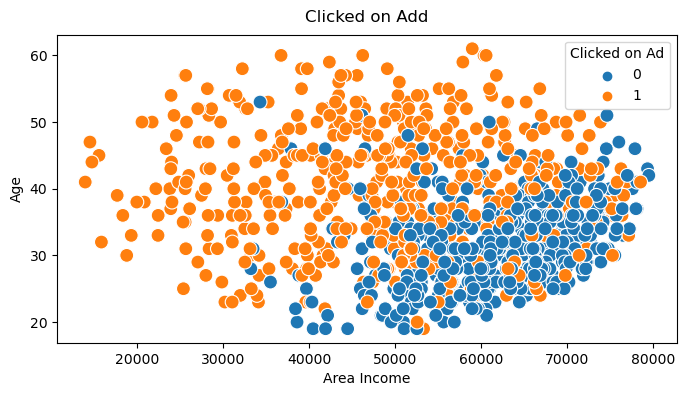

In [4]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Area Income', y='Age', hue='Clicked on Ad', data=df, s=100)
plt.title("Clicked on Add", y=1.015)
plt.ylabel("Age")
ax = plt.gca()

In [5]:
# train test split
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=80)  # Get 60% of the dataset as the training set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)  # Split 40% subset into cross validation, test set
# data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)  # Compute the mean and standard deviation of the training set then transform it


### 3. Train model with SGDClassifier
- Train model, report training and cross validation MSE
- Choose polynomial feature

Result: 
SGDClassifier gives the smallest MSE at degree 4. So, we choose polynomial feature of degree 4

In [6]:
clf_model = SGDClassifier(loss='log_loss', max_iter=100000, n_iter_no_change=1000)
clf_model.fit(X_train_scaled, y_train)

print(f"Number of iterations completed: {clf_model.n_iter_}, number of weight updates: {clf_model.t_}")
b_norm = clf_model.intercept_
w_norm = clf_model.coef_
print(f"Model parameters: \n\tw: {w_norm}, b:{b_norm}")

ypred = clf_model.predict(X_train_scaled)
print(f"Training MSE: {mean_squared_error(y_train, ypred) / 2}")

X_cv_scaled = scaler.transform(x_cv)  # Scale the cross validation set
yhat = clf_model.predict(X_cv_scaled)  # Feed the scaled cross validation set
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")
print(f"F1 Score for CV: {f1_score(y_cv, yhat)}")

Number of iterations completed: 1369, number of weight updates: 821401.0
Model parameters: 
	w: [[ 1.4172317 -1.3078715]], b:[0.18419136]
Training MSE: 0.1
Cross validation MSE: 0.0925
F1 Score for CV: 0.8229665071770336


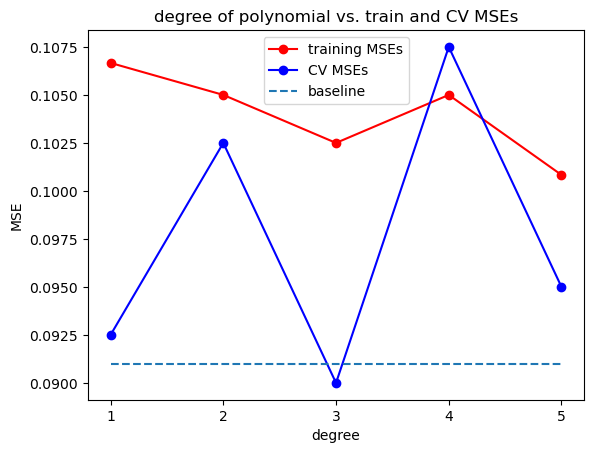

Lowest CV MSE is found in the model with degree=3
Corresponding training MSE: 0.10
Corresponding cross validation MSE: 0.09


In [7]:
s_model_n = SGDClassifier(loss='log_loss')
s_degrees, s_train_mses, s_cv_mses, s_scalers, s_models = utils.train_poly(s_model_n, X_train_scaled, y_train, X_cv_scaled, y_cv)
utils.plot_train_cv_mses(s_degrees, s_train_mses, s_cv_mses, baseline=0.091)

degree = np.argmin(s_cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")
print(f"Corresponding training MSE: {s_train_mses[degree-1]:.2f}")
print(f"Corresponding cross validation MSE: {s_cv_mses[degree-1]:.2f}")

### 4. Train model with LogisticRegression
- Train model, report training and cross validation MSE
- Choose polynomial feature

Result: 
LogisticRegression gives the smallest MSE at degree 1. So, we choose polynomial feature of degree 1

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

print(f"Number of iterations completed: {lr_model.n_iter_}")
b_norm = lr_model.intercept_
w_norm = lr_model.coef_
print(f"Model parameters:   \n\tw: {w_norm}, b:{b_norm}")

y_pred = lr_model.predict(X_train_scaled)
print(f"Training MSE: {mean_squared_error(y_train, y_pred) / 2}")

yhat = lr_model.predict(X_cv_scaled)  # Feed the scaled cross validation set
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")
print(f"F1 Score for CV: {f1_score(y_cv, yhat)}")

Number of iterations completed: [8]
Model parameters:   
	w: [[ 1.38258257 -1.26639644]], b:[0.18886723]
Training MSE: 0.09833333333333333
Cross validation MSE: 0.0925
F1 Score for CV: 0.8229665071770336


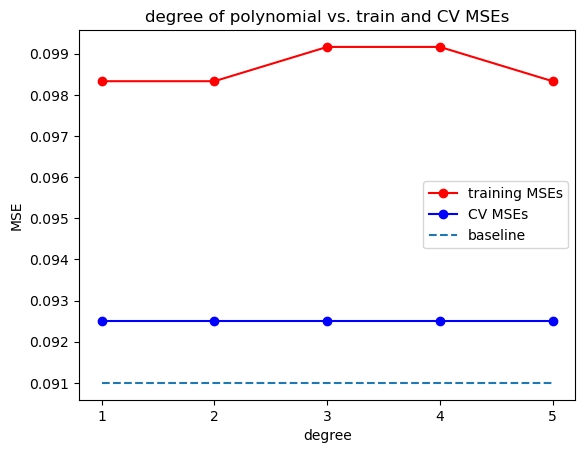

Lowest CV MSE is found in the model with degree=1
Corresponding training MSE: 0.10
Corresponding cross validation MSE: 0.09


In [9]:
lr_model_n = LogisticRegression()
lr_degrees, lr_train_mses, lr_cv_mses, lr_scalers, lr_models = utils.train_poly(lr_model_n, X_train_scaled, y_train, X_cv_scaled, y_cv)
utils.plot_train_cv_mses(lr_degrees, lr_train_mses, lr_cv_mses, baseline=0.091)

degree = np.argmin(lr_cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")
print(f"Corresponding training MSE: {lr_train_mses[degree-1]:.2f}")
print(f"Corresponding cross validation MSE: {lr_cv_mses[degree-1]:.2f}")


### 5. Model selection using ROC curve
An ROC curve demonstrates:
- The tradeoff between sensitivity and specificity
- The closer the ROC curve follows the left-hand border and the top border, the more accurate the model
- The larger the area under ROC, the better the model

On comparing LogisticRegression and SGDClassifier for this dataset, LogisticRegression gives a bigger ROC area under the curve. So, we choose LogisticRegression

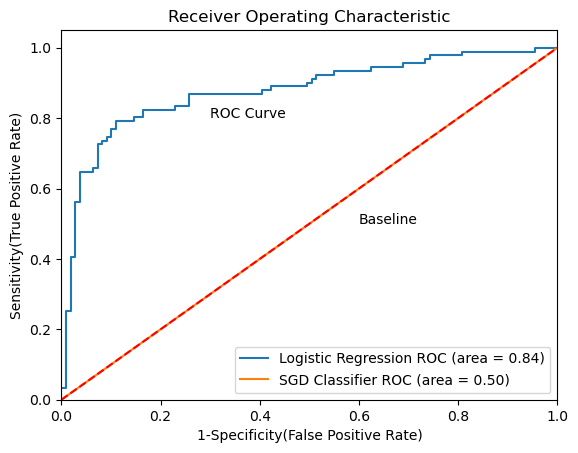

In [10]:
# Add the models to the list that you want to view on the ROC plot
models = [{'label': 'Logistic Regression', 'model': LogisticRegression()},
{'label': 'SGD Classifier', 'model': SGDClassifier(loss='log_loss', max_iter=100000, n_iter_no_change=1000)}]
utils.plot_roc(models, x_train, y_train, x_test, y_test)

In [11]:
# Add polynomial features to the test set
print('After comparing cross validation MSE and ROC, choose Logistic Regression model')
degree = np.argmin(lr_cv_mses) + 1
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = lr_scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = lr_models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {lr_train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {lr_cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

After comparing cross validation MSE and ROC, choose Logistic Regression model
Training MSE: 0.10
Cross Validation MSE: 0.09
Test MSE: 0.23


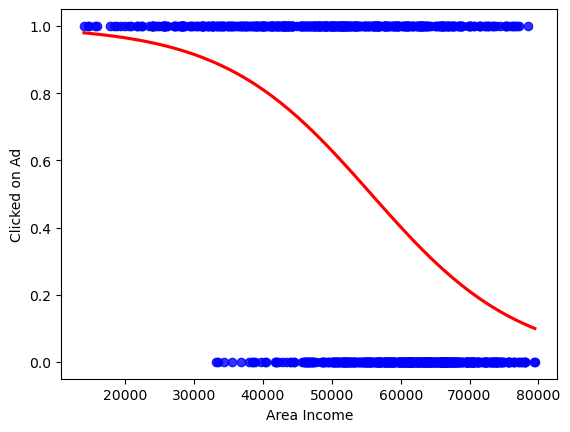

In [12]:
# plot logistic regression curve with black points and red line
sns.regplot(x=df['Area Income'], y=df['Clicked on Ad'], data=df, logistic=True, ci=None,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

### 6. Learning curve
- The following learning curve calculated using the training dataset to give an idea of how well the model is learning

Result: 
- High bias problem
- The gap for the training and validation curve becomes extremely small as the training dataset size increases. This indicates that adding more examples to our model is not going to improve its performance. 

Normally, to fix high bias problem:
- Add more features
- Create higher degree polynomial features
- Decrease regularization 

However, as calculated above, the best polynomial feature is at degree 1. So, it is better to add more feature, or decrease regularization.

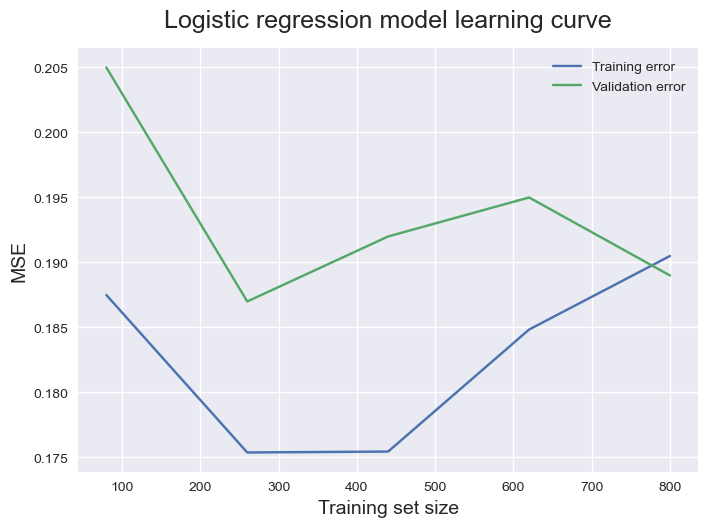

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
utils.plot_learning_curve(X_scaled, y, LogisticRegression(), random_state=6)